## Подключаем Google Disс и заливаем данные




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/My\ Drive


/content/drive/My Drive


In [ ]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
 from google.colab import files
 files.upload()

Saving bodyfat.csv to bodyfat.csv


{'bodyfat.csv': b'Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist\n1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1\n1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2\n1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6\n1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2\n1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7\n1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8\n1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7\n1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8\n1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2\n1.0722,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2\n1.0830,7.1,26,186.25,74.50,38.5,101.5,83.6,98.2,59.7,39.7,25.2,32.8,29.4,18.5\n1.0812,7.

## Классическая ML. регрессия



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

fat_df = pd.read_csv('bodyfat.csv')

In [ ]:
fat_df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
# del fat_df['Density']

In [ ]:
fat_df.BodyFat.describe()

count    252.000000
mean      19.150794
std        8.368740
min        0.000000
25%       12.475000
50%       19.200000
75%       25.300000
max       47.500000
Name: BodyFat, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fat_df.drop('BodyFat',axis=1), fat_df['BodyFat'], test_size=0.33, random_state=42)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

print(mean_squared_error(y_test, pred, squared=True))

19.814230545541793


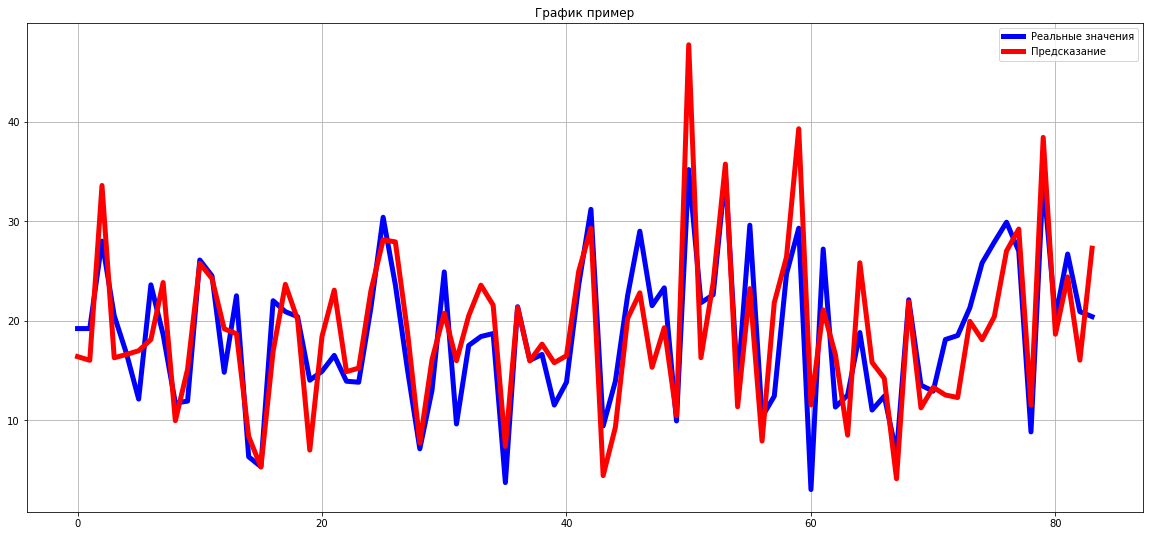

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(y_test.values, "blue",linewidth=5, label='Реальные значения')
plt.plot(pred, "red",linewidth=5, label='Предсказание')
plt.legend(loc='best')
plt.title("График пример")
plt.grid(True)
plt.show()

## Попробуем построить модель с помощью деревьев

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
pred_clf = clf.predict(X_test)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("smpl") 

'smpl.pdf'

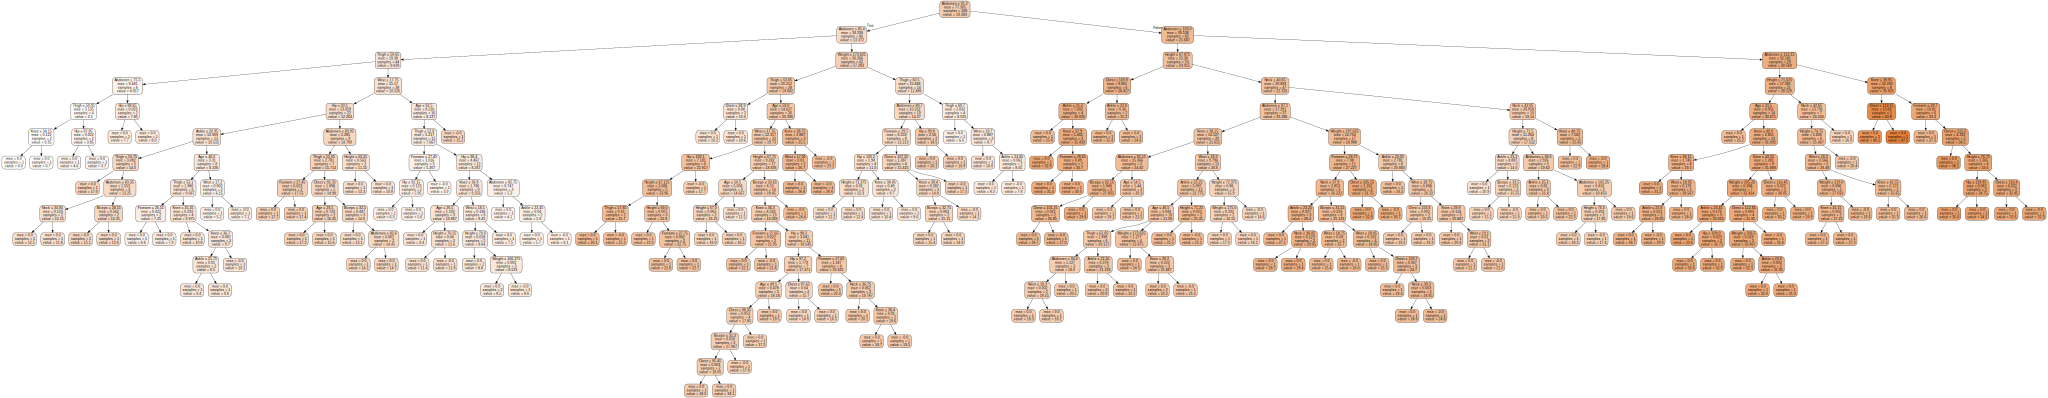

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=fat_df.drop('BodyFat',axis=1).columns,  
                      class_names=fat_df.BodyFat,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
frame = { 'FeatureImportance': clf.feature_importances_, 'Feature': X_train.columns }
result = pd.DataFrame(frame)
result.sort_values(by='FeatureImportance', ascending=False).head(10)

,FeatureImportance,Feature
5,0.717395,Abdomen
1,0.049806,Weight
7,0.045760,Thigh
2,0.042861,Height
12,0.025778,Wrist
8,0.025296,Knee
3,0.024621,Neck
0,0.017299,Age
6,0.016044,Hip
9,0.014438,Ankle
